In [5]:
import Pkg; Pkg.status()

Status `~/.julia/environments/v1.10/Project.toml`
  [e30172f5] Documenter v1.4.1
  [7073ff75] IJulia v1.24.2
  [2b0e0bc5] LanguageServer v4.5.1
  [2edaba10] Nemo v0.45.5
  [91a5bcdd] Plots v1.40.4
  [17f5de1a] PyQDecoders v0.2.1
  [6099a3de] PythonCall v0.9.20
  [b0d11df0] Quantikz v1.3.1
  [0525e862] QuantumClifford v0.9.4 `../../../Documents/Repos/QuantumClifford.jl`
  [295af30f] Revise v3.5.14
  [37e2e46d] LinearAlgebra


In [6]:
using Revise
using QuantumClifford, QuantumClifford.ECC
using PyQDecoders

Precompiling QuantumClifford
  ✓ QuantumClifford
  1 dependency successfully precompiled in 15 seconds. 39 already precompiled.
Precompiling QuantumCliffordQuantikzExt
  ✓ QuantumClifford → QuantumCliffordQuantikzExt
  1 dependency successfully precompiled in 2 seconds. 110 already precompiled.
Precompiling QuantumCliffordPyQDecodersExt
  ✓ QuantumClifford → QuantumCliffordPyQDecodersExt
  1 dependency successfully precompiled in 3 seconds. 128 already precompiled.


In [7]:
using Quantikz

In [8]:
import PyQDecoders

In [9]:
# methods(random_circuit_code)

# All-to-all connection

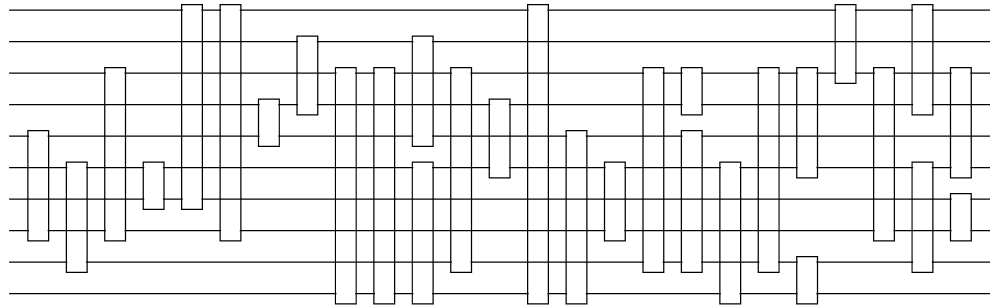

In [11]:
c1 = random_circuit_code(10, Val(:alltoall), 30, 2)
c1.circ

In [12]:
c1 |> parity_checks

+ Y_ZXZZZ___
- Z_X_Z_Z_ZZ
- ZYZZ____Y_
+ __YZYZX_ZY
- Z_XX_Z_Z__
+ YXY___Y_ZX
- ___YYYX_XX
+ X__YXZY_Y_

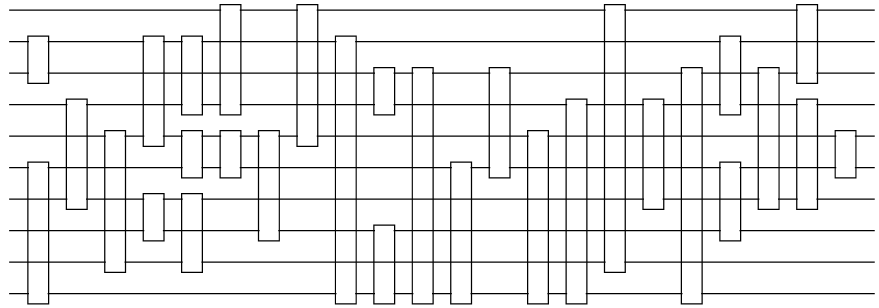

In [13]:
c2 = random_circuit_code(10, Val(:alltoall), 30, 1:2:7)
c2.circ

In [14]:
c2 |> parity_checks

+ Z_Y_X___Z_
+ _Y_Z__X___
- ZZ_ZZXZXX_
+ X_Y_Y__YZ_
- _YX_____Y_
- _ZYZXYYZ_Y

# Brickwork connection

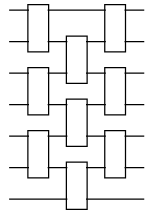

In [15]:
c3 = random_circuit_code((7,), Val(:brickwork), 3, [1,3,7])
c3.circ

In [16]:
c3 |> parity_checks

- XY_____
+ ____YZ_
+ __XX_ZY
- __XX___

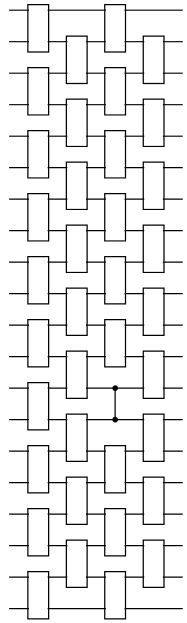

In [17]:
c4 = random_circuit_code((20,), Val(:brickwork), 4, 1:2:20)
c4.circ

In [18]:
c4 |> parity_checks

- XZY_________________
- Z_XZXZ______________
+ _Z__________________
+ ____ZXX__XX_________
+ _____ZZZX__XX_______
- _______XXXXZ________
- ____________XZXZZ___
+ ____________XXYZ_XZ_
+ _______________ZZZYZ
- _______________XX_YZ

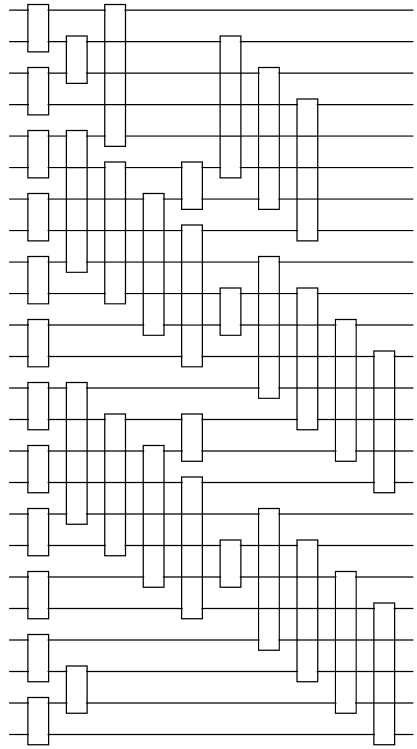

In [19]:
c5 = random_circuit_code((4,6), Val(:brickwork), 4, 1:10)
c5.circ

In [20]:
c5 |> parity_checks

+ _Z_Y_ZXZ___Y___Z________
+ _Y_X__XZ________________
+ _________Y__Z____XX__Z__
- _________Y_______XX__Z__
- ___________X___Y_______Z
- _________YZX__ZY_______Z
+ ____________Z___Y_______
- _________X__ZZY_Y_Z_____
+ ___________X___X_XZZ_X_Y
+ _________YZX__ZX_X_Z_Z_X
+ _________________X__Y_X_
+ ________________YX__Z_Y_
+ _________________Y_X_YZZ
- _________________Y___YZ_

# Decoding

Here, we test logical error rates 

In [21]:
using Random

In [22]:
Random.seed!(43)

TaskLocalRNG()

In [23]:
codes_test = [random_circuit_code((20,), Val(:brickwork), 500, [1]) for i  in 1:10];

In [24]:
noise = 0.001

setups = [
    CommutationCheckECCSetup(noise),
    NaiveSyndromeECCSetup(noise, 0),
    ShorSyndromeECCSetup(noise, 0),
]

for c in codes_test
    # @show c.arrange, c.connect
    for s in setups
        # @show s
        for d in [TableDecoder]
            e = evaluate_decoder(d(c), s, 100000)
            if max(e...) >= noise/4
                @info c.arrange, c.connect, max(e...), noise/4
            end
        end
    end
end

┌ Warning: Could not compactify the circuit, falling back to a slower version of the simulation. Consider reporting this issue to the package maintainers to improve performance. The offending gate was `ClassicalXOR{17}((86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102), 292)`.
└ @ QuantumClifford ~/Documents/Repos/QuantumClifford.jl/src/pauli_frames.jl:181
┌ Warning: Could not compactify the circuit, falling back to a slower version of the simulation. Consider reporting this issue to the package maintainers to improve performance. The offending gate was `ClassicalXOR{17}((86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102), 292)`.
└ @ QuantumClifford ~/Documents/Repos/QuantumClifford.jl/src/pauli_frames.jl:181
┌ Warning: Could not compactify the circuit, falling back to a slower version of the simulation. Consider reporting this issue to the package maintainers to improve performance. The offending gate was `ClassicalXOR{19}((32, 33, 34, 35, 36, 

In [25]:
codes_test = [random_circuit_code((20,), Val(:brickwork), 1000, [1]) for i  in 1:5];

In [28]:
noise = 0.01

setups = [
    CommutationCheckECCSetup(noise),
    NaiveSyndromeECCSetup(noise, 0),
    ShorSyndromeECCSetup(noise, 0),
]

for c in codes_test
    # @show c.arrange, c.connect
    for s in setups
        # @show s
        for d in [PyBeliefPropDecoder]
            e = evaluate_decoder(d(c), s, 10000)
            if max(e...) >= noise/4
                @info c.arrange, c.connect, max(e...), noise/5
            end
        end
    end
end

LoadError: "Codes of type CircuitCode do not have separate X and Z parity checks, either because they are not a CSS code and thus inherently do not have separate checks, or because its separate checks are not yet implemented in this library."

# P